<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%B0%95%EB%B4%89%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습문제 1
- 기상자료개방포털에서 본인이 태어난 지역의 “2000년-2010년”에 대한 데이터를 다운 받은 후 문제를 해결해보자.
- 기상청 사이트: https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

In [2]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법
# 1) 한글 폰트 설치
# 2) 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 12s (820 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [1]:
# 3) 한글 폰트 읽어오기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

### 데이터 불러오기

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
weather=pd.read_csv('(2000-2010) weather.csv')
weather.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2000-01-01,108,5.5,1.8,9.9
1,2000-01-02,108,4.2,-0.9,6.9
2,2000-01-03,108,-2.2,-4.6,0.1
3,2000-01-04,108,0.3,-4.3,4.3
4,2000-01-05,108,2.8,0.1,4.6


### 문제1) 
- 다음은 데이터를 분석하기 전 전처리에 대한 과정이다. 실행 결과를 보고 빈곳에 가장 알맞은 코드를 작성하시오.

In [15]:
# 날짜컬럼자료형을 날짜형식으로 변경
weather['날짜']= pd.to_datetime(weather.날짜)
print(weather.info())
# 컬럼 생성
weather['year']= weather.날짜.dt.year
weather['month']= weather.날짜.dt.month
weather['day']= weather.날짜.dt.day
# 컬럼 삭제
weather.drop('지점',axis=1,inplace=True)
# 컬럼명 변경
weather.rename(columns={"평균기온(℃)":"temp", "날짜":"date"}, inplace=True) # 빈칸
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4018 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB
None


,date,temp,최저기온(℃),최고기온(℃),year,month,day
0,2000-01-01,5.5,1.8,9.9,2000,1,1
1,2000-01-02,4.2,-0.9,6.9,2000,1,2
2,2000-01-03,-2.2,-4.6,0.1,2000,1,3
3,2000-01-04,0.3,-4.3,4.3,2000,1,4
4,2000-01-05,2.8,0.1,4.6,2000,1,5


### 문제1-2) 
- 다음은 데이터 분석에 사용할 데이터를 필터링한 후 새로운 데이터프레임을 생성하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

In [17]:
weather = weather[['date','temp','year','month','day']]
conditions = (weather.date.dt.month == 9)& (weather.date.dt.day==1)
df0901 = weather[conditions]
df0901

,date,temp,year,month,day
244,2000-09-01,24.4,2000,9,1
609,2001-09-01,26.1,2001,9,1
974,2002-09-01,23.5,2002,9,1
1339,2003-09-01,22.0,2003,9,1
1705,2004-09-01,24.7,2004,9,1
2070,2005-09-01,26.8,2005,9,1
2435,2006-09-01,24.2,2006,9,1
2800,2007-09-01,20.4,2007,9,1
3166,2008-09-01,19.7,2008,9,1
3531,2009-09-01,23.7,2009,9,1


### 문제1-3) 
- 다음은 year, temp 데이터에 대한 산점도 그래프를 그리는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

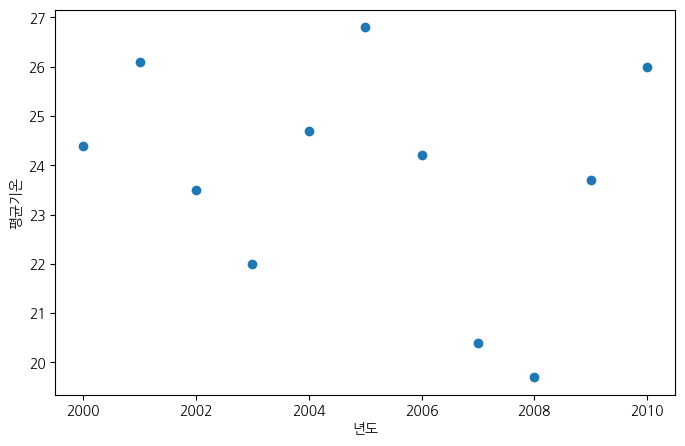

In [21]:
fig = plt.figure(figsize=(8,5))
X = df0901.year
Y = df0901.temp
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X,Y)
plt.rcParams['axes.unicode_minus']=False
plt.show()

### 문제1-4) 
- 10년 치의 9월 1일에 분석된 데이터를 통해 2022년 9월 1일 개강일의 기온을 예측하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

In [22]:
# 단순선형회귀분석 : 2022년 09월1일 개강일의 기온 예측하기
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
X = df0901[['year']]
Y = df0901['temp']

# LinearRegression 모델을 생성하고, 그 안에 X, y 데이터 fit 시킴
# 빈칸
model.fit(X, Y)
X_predict = pd.DataFrame([[2022]], columns=['year'])
result = model.predict(X_predict)

print(result)   

[21.19181818]


## 연습문제 2
 - 키,몸무게 데이터를 분석

In [24]:
#  필요한 모듈 불러오기
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 엑셀 파일로 키와 몸무게가 들어 있는 파일을 불러온 후 확인
df = pd.read_excel('health_screenings_2020_1000ea.xlsx')
df.head()

,year,city_code,gender,age_code,height,weight
0,2020,11,1,10,175,65
1,2020,11,2,15,150,60
2,2020,41,2,15,155,60
3,2020,41,1,9,165,60
4,2020,31,1,9,160,55


### 문제2-1)
 - 학습모델을 생성하고 데이터를 fit시키는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

예상몸무게 [82.81082122]


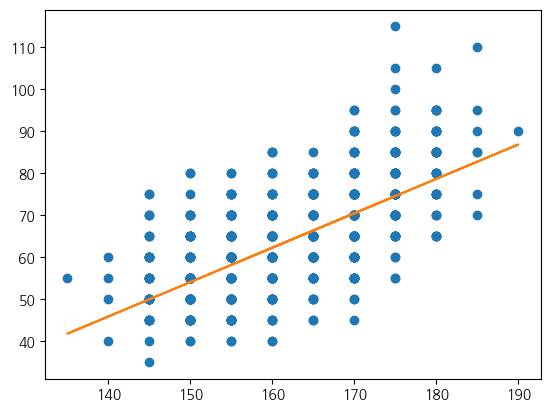

In [47]:
# 학습 모델 생성하고 데이터를 fit 시킴
model = LinearRegression()
df['height'] = df.height.astype('float')
X = df[['height']]
Y= df['weight']
model.fit(X, Y)

# 예측
print('예상몸무게',model.predict(pd.DataFrame([[185]], columns=['height']))) # array([82.81082122])

# 기존 X 값으로 y를 예측하게 해서 그래프 그리기
plt.plot(X, Y, 'o')
plt.plot(X,model.predict(pd.DataFrame(X.values.reshape(-1,1), columns=['height'])))
plt.show()

### 문제2-2) 
 - 다음은 시본모듈을 이용하여 추세선을 넣는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

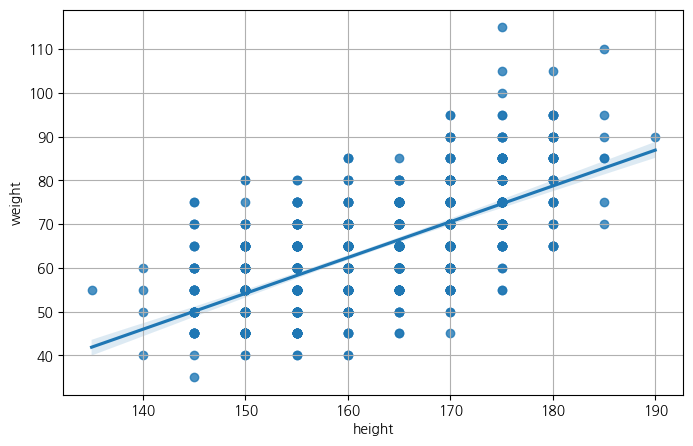

In [49]:
# 시본 모듈로 추세선 넣기
fig = plt.figure(figsize=(8, 5))   
sns.regplot(x='height', y='weight', data=df)
plt.grid()
plt.show()

## 연습문제 3
 - 다중선형회귀분석

In [50]:
# 데이터불러오기
import pandas as pd
manhattan = pd.read_csv('manhattan.csv')
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### 문제3-1)
 - 다음은 데이터 세트 Training & Test 7:3로 분리하고 학습모델을 생성하는 코드이다. 그리고 직접 데이터를 입력하여 주택 임대료를 예측하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 작성하시오.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리하기 (Training & Test) 7:3로 분리
x = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = manhattan[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.columns = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']
x_test.columns = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']

# 학습모델 생성하기
model = LinearRegression()
model.fit(x_train, y_train) 

# 직접데이터를 입력하여 주택 임대료 예측
my_apartment = pd.DataFrame([[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]], columns=x_train.columns)
my_predict = model.predict(my_apartment)
my_predict

array([[2420.21010774]])

### 문제3-2)
 - 다음은 x_test 데이터를 이용하여 y_predict를 예측하는 코드이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 완성하시오.

In [52]:
y_predict = model.predict(x_test)
y_predict[:10]

array([[2993.88072013],
       [6699.95509377],
       [4683.98682738],
       [3942.11861454],
       [3407.63988125],
       [6337.84992965],
       [6605.50508698],
       [5418.42543175],
       [5169.79743737],
       [2711.16836358]])

### 문제 3-3)
 - 다음 코드는 실제 임대료와 예측 임대료에 대한 산점도 그래프이다. 실행 결과를 보고 빈 곳에 가장 알맞은 코드를 완성하시오.

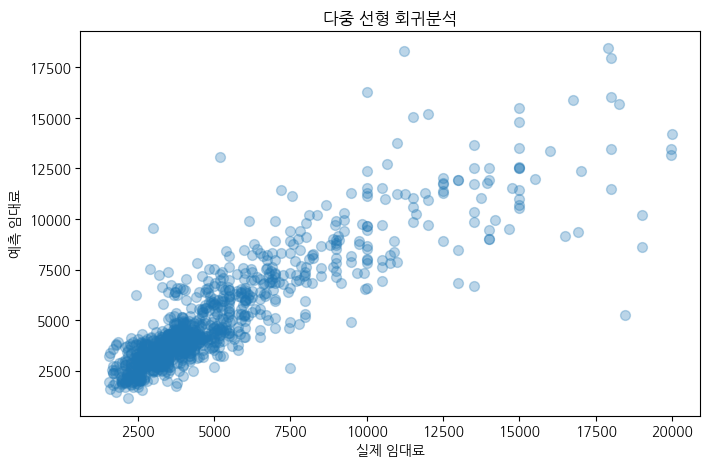

In [55]:
# matplotlib의 시각화를 통한 간단 확인 - x축 실제 임대료, y축 예측한 임대료

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))

plt.scatter(x = y_test,  y=model.predict(x_test), s=50, alpha=0.3)
plt.xlabel('실제 임대료')
plt.ylabel('예측 임대료')
plt.title('다중 선형 회귀분석')
plt.show()

### 문제 3-4)
 - 다음은 다중선형회귀 모델의 성능을 측정하기 위한 코드이다. 결정계수의 값을 구하는 적절한 함수를 쓰시오.

In [57]:
print(model.score(x_train, y_train))

0.7818059033418578


⇒ 결정계수 R²의 최댓값은 1이며, 이 수치가 클수록 실제값과 예측값이 유사함을 의미
- 위에서 모델링한 다중선형회귀모델은 약 0.79의 결정계수를 가지며,
- 이는 주택 임대료의 79%를 위 14개의 항목으로 설명할 수 있다는 의미